# 🚀 Rensa Dataset Deduplication Tool

This notebook provides a powerful, easy-to-use interface for deduplicating datasets using **Rensa** -
a high-performance MinHash implementation that's **40x faster** than traditional methods.

## Key Features:
- **Multiple Algorithms**: Choose from RMinHash, CMinHash, or OptDensMinHash
- **LSH Support**: Efficient deduplication for large datasets using Locality-Sensitive Hashing
- **Direct Upload**: Automatically upload deduplicated datasets back to Hugging Face
- **Comprehensive Analytics**: Detailed statistics and performance metrics
- **Flexible Configuration**: Customize similarity thresholds and algorithm parameters

## Supported Algorithms:
1. **RMinHash**: Balanced speed and accuracy (recommended for most use cases)
2. **CMinHash**: Maximum performance (~17x faster than datasketch)
3. **OptDensMinHash**: Best for sparse datasets or fewer permutations
4. **RMinHashLSH**: Efficient for very large datasets using LSH indexing

✅ Configuration loaded successfully!
📊 Dataset: gretelai/synthetic_text_to_sql (train)
🔧 Algorithm: RMinHashLSH
🎯 Similarity Threshold: 0.85
📤 Upload to HF: True
✅ All dependencies installed successfully!
✅ Libraries imported successfully!
🕐 Current time: 2025-06-02 11:50:54
✅ Successfully authenticated with Hugging Face!
👤 Logged in as: Syed-Hasan-8503
📥 Loading dataset: gretelai/synthetic_text_to_sql
✅ Dataset loaded in 1.09 seconds
📊 Dataset size: 100,000 rows
📋 Columns: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']
📈 Average text length: 15.6 words
📊 Text length range: 3 - 86 words
✅ Deduplication classes loaded successfully!
🎯 Starting deduplication with RMinHashLSH
⚙️ Parameters: 128 permutations, threshold 0.85
🔄 Starting LSH-based deduplication...
📊 Step 1: Generating MinHash signatures...
⏳ Generated 10,000/100,000 signatures (10.0%)
⏳ G

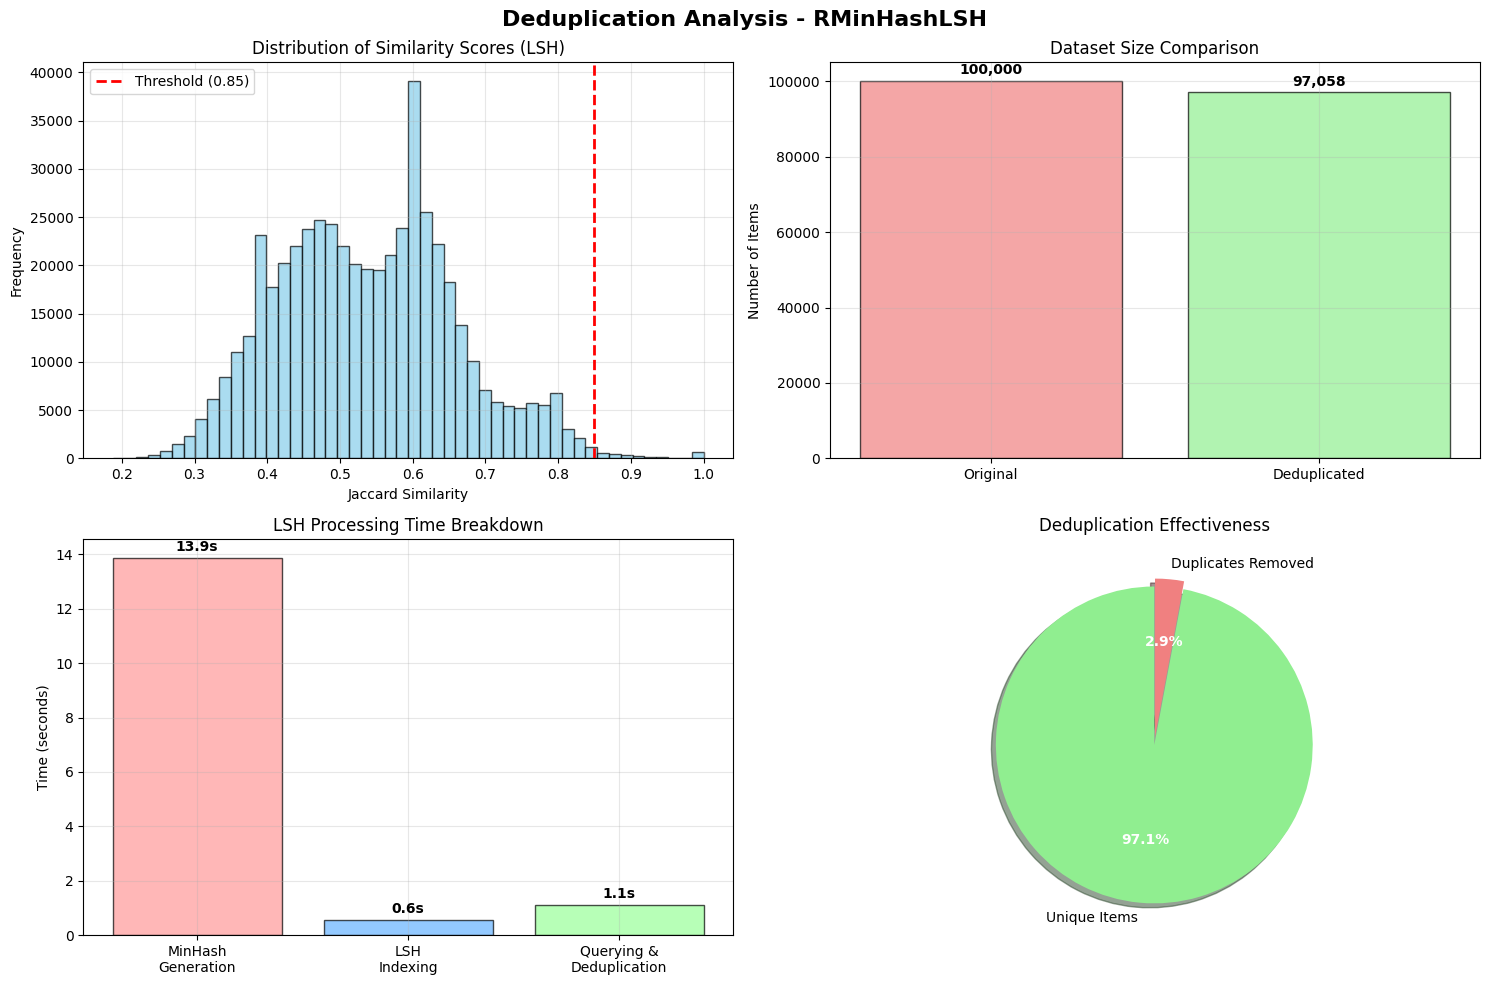

✅ Visualization completed!
💾 Saving analytics report to deduplication_report_RMinHashLSH_20250602_115114.json
✅ Analytics report saved.

🚀 UPLOADING DEDUPLICATED DATASET TO HUGGING FACE
Creating Hugging Face repository: Syed-Hasan-8503/Test-dataset (private=False)
✅ Repository 'Syed-Hasan-8503/Test-dataset' created or already exists.
🚀 Pushing deduplicated dataset to 'Syed-Hasan-8503/Test-dataset'...


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/98 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/720 [00:00<?, ?B/s]

🎉 Successfully uploaded deduplicated dataset to https://huggingface.co/datasets/Syed-Hasan-8503/Test-dataset
Uploading analytics report 'deduplication_report_RMinHashLSH_20250602_115114.json' to 'Syed-Hasan-8503/Test-dataset'...
✅ Analytics report uploaded.

✨ Deduplication process completed!


In [ ]:
# Rensa Dataset Deduplication Tool
# High-Performance Dataset Deduplication using Rensa MinHash

"""
# 🚀 Rensa Dataset Deduplication Tool

This notebook provides a powerful, easy-to-use interface for deduplicating datasets using **Rensa** -
a high-performance MinHash implementation that's **40x faster** than traditional methods.

## Key Features:
- **Multiple Algorithms**: Choose from RMinHash, CMinHash, or OptDensMinHash
- **LSH Support**: Efficient deduplication for large datasets using Locality-Sensitive Hashing
- **Direct Upload**: Automatically upload deduplicated datasets back to Hugging Face
- **Comprehensive Analytics**: Detailed statistics and performance metrics
- **Flexible Configuration**: Customize similarity thresholds and algorithm parameters

## Supported Algorithms:
1. **RMinHash**: Balanced speed and accuracy (recommended for most use cases)
2. **CMinHash**: Maximum performance (~17x faster than datasketch)
3. **OptDensMinHash**: Best for sparse datasets or fewer permutations
4. **RMinHashLSH**: Efficient for very large datasets using LSH indexing

---
"""

# @title ## 📋 **Configuration Parameters** {display-mode: "form"}

# @markdown ### 🎯 **Dataset Configuration**
dataset_name  = "gretelai/synthetic_text_to_sql"  # @param {type:"string"}
dataset_split = "train"  # @param ["train", "test", "validation", "all"] {allow-input: true}
text_column   = "sql"  # @param {type:"string"}
sample_size = 0  # @param {type:"integer"}

# @markdown *Leave sample_size as 0 to use the entire dataset*

# @markdown ### 🔧 **Algorithm Configuration**
algorithm = "RMinHashLSH"  # @param ["RMinHash", "CMinHash", "OptDensMinHash", "RMinHashLSH"]
num_permutations = 128  # @param {type:"slider", min:64, max:512, step:64}
similarity_threshold = 0.85  # @param {type:"slider", min:0.5, max:0.99, step:0.01}
random_seed = 42  # @param {type:"integer"}

# @markdown ### 🚀 **LSH Configuration** (Only for RMinHashLSH)
lsh_num_bands = 16  # @param {type:"slider", min:8, max:32, step:8}
lsh_threshold = 0.8  # @param {type:"slider", min:0.5, max:0.95, step:0.05}

# @markdown ### 📤 **Upload Configuration**
upload_to_hf = True  # @param {type:"boolean"}
target_repo = ""  # @param {type:"string"}
hf_token = ""  # @param {type:"string"}
private_repo = False  # @param {type:"boolean"}

# @markdown *Leave target_repo empty to auto-generate a name. Get your token from https://huggingface.co/settings/tokens*

# @markdown ### 📊 **Analysis Options**
show_detailed_stats = True  # @param {type:"boolean"}
show_similarity_distribution = True  # @param {type:"boolean"}
export_removed_samples = False  # @param {type:"boolean"}

print("✅ Configuration loaded successfully!")
print(f"📊 Dataset: {dataset_name} ({dataset_split})")
print(f"🔧 Algorithm: {algorithm}")
print(f"🎯 Similarity Threshold: {similarity_threshold}")
print(f"📤 Upload to HF: {upload_to_hf}")

# @title ## 🔧 **Install Dependencies** {display-mode: "form"}

# @markdown This cell installs all required packages including Rensa

!pip install -qU rensa huggingface_hub matplotlib seaborn pandas==2.2.2 tqdm
!pip install -qU datasets==2.20.0

print("✅ All dependencies installed successfully!")

# @title ## 📚 **Import Libraries and Setup** {display-mode: "form"}

import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from typing import Dict, List, Tuple, Optional, Any
import warnings
warnings.filterwarnings('ignore')

# Rensa imports
from rensa import RMinHash, CMinHash, OptDensMinHash, RMinHashLSH

# Hugging Face imports
from datasets import load_dataset, Dataset
from huggingface_hub import HfApi, login, create_repo

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"🕐 Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# @title ## 🔐 **Hugging Face Authentication** {display-mode: "form"}

if upload_to_hf and hf_token:
    try:
        login(token=hf_token, add_to_git_credential=True)
        print("✅ Successfully authenticated with Hugging Face!")

        # Test API access
        api = HfApi()
        user_info = api.whoami()
        print(f"👤 Logged in as: {user_info['name']}")

    except Exception as e:
        print(f"❌ Authentication failed: {e}")
        print("Please check your token and try again.")
        upload_to_hf = False
elif upload_to_hf:
    print("⚠️ No HF token provided. Upload disabled.")
    upload_to_hf = False
else:
    print("ℹ️ Hugging Face upload disabled.")

# @title ## 📊 **Load and Analyze Dataset** {display-mode: "form"}

def load_and_analyze_dataset(dataset_name: str, split: str, sample_size: int = 0, text_column: str = "text") -> Tuple[Dataset, Dict]:
    """Load dataset and provide basic analysis"""

    print(f"📥 Loading dataset: {dataset_name}")
    start_time = time.time()

    try:
        # Load dataset
        if split == "all":
            dataset_dict = load_dataset(dataset_name)
            # Concatenate all splits
            all_data = []
            for split_name, split_data in dataset_dict.items():
                all_data.extend(split_data)
            dataset = Dataset.from_list(all_data)
        else:
            dataset = load_dataset(dataset_name, split=split)

        load_time = time.time() - start_time

        # Sample if requested
        original_size = len(dataset)
        if sample_size > 0 and sample_size < len(dataset):
            dataset = dataset.shuffle(seed=random_seed).select(range(sample_size))
            print(f"📝 Sampled {sample_size} rows from {original_size} total rows")

        # Analyze dataset
        print(f"✅ Dataset loaded in {load_time:.2f} seconds")
        print(f"📊 Dataset size: {len(dataset):,} rows")
        print(f"📋 Columns: {list(dataset.features.keys())}")

        # Validate text column
        if text_column not in dataset.features:
            available_cols = list(dataset.features.keys())
            raise ValueError(f"Column '{text_column}' not found. Available columns: {available_cols}")

        # Analyze text column
        texts = dataset[text_column]
        text_lengths = [len(str(text).split()) for text in texts[:1000]]  # Sample for analysis

        analysis = {
            'total_rows': len(dataset),
            'original_size': original_size,
            'load_time': load_time,
            'text_column': text_column,
            'avg_text_length': np.mean(text_lengths),
            'median_text_length': np.median(text_lengths),
            'min_text_length': min(text_lengths),
            'max_text_length': max(text_lengths),
        }

        print(f"📈 Average text length: {analysis['avg_text_length']:.1f} words")
        print(f"📊 Text length range: {analysis['min_text_length']} - {analysis['max_text_length']} words")

        return dataset, analysis

    except Exception as e:
        print(f"❌ Error loading dataset: {e}")
        raise

# Load the dataset
dataset, dataset_analysis = load_and_analyze_dataset(
    dataset_name, dataset_split, sample_size, text_column
)

# @title ## 🔄 **MinHash Implementation Classes** {display-mode: "form"}

class DeduplicationAnalyzer:
    """Comprehensive deduplication analyzer with multiple algorithms"""

    def __init__(self, algorithm: str, num_perm: int = 128, seed: int = 42, **kwargs):
        self.algorithm = algorithm
        self.num_perm = num_perm
        self.seed = seed
        self.kwargs = kwargs
        self.stats = {}

    def create_minhash(self):
        """Create appropriate MinHash object"""
        if self.algorithm == "RMinHash":
            return RMinHash(num_perm=self.num_perm, seed=self.seed)
        elif self.algorithm == "CMinHash":
            return CMinHash(num_perm=self.num_perm, seed=self.seed)
        elif self.algorithm == "OptDensMinHash":
            return OptDensMinHash(num_perm=self.num_perm, seed=self.seed)
        else:
            raise ValueError(f"Unsupported algorithm: {self.algorithm}")

    def deduplicate_direct(self, dataset: Dataset, text_column: str, threshold: float) -> Tuple[List[int], Dict]:
        """
        Direct deduplication using MinHash signatures.
        This method performs exact signature matching for deduplication.
        For approximate deduplication, RMinHashLSH is recommended for performance.
        """

        print(f"🔄 Starting {self.algorithm} direct deduplication (exact signature match)...")
        if threshold < 1.0:
            print("⚠️ Warning: For approximate deduplication with a threshold < 1.0, "
                  "RMinHashLSH is significantly more performant for large datasets. "
                  "This direct method is optimized for exact signature matches.")

        start_time = time.time()

        unique_signatures = set()
        deduplicated_indices = []
        removed_indices = [] # To store indices of removed samples

        # Progress tracking
        total_items = len(dataset)

        print(f"📊 Processing {total_items:,} items...")

        for idx, example in enumerate(dataset):
            if idx % 10000 == 0 and idx > 0:
                elapsed = time.time() - start_time
                rate = idx / elapsed
                eta = (total_items - idx) / rate
                print(f"⏳ Processed {idx:,}/{total_items:,} ({idx/total_items*100:.1f}%) - ETA: {eta:.1f}s")

            # Create MinHash
            minhash_obj = self.create_minhash()
            text_content = str(example[text_column])
            tokens = text_content.split()
            minhash_obj.update(tokens)

            # Get signature
            signature = tuple(minhash_obj.digest())

            # Check for duplicates (exact signature match)
            if signature not in unique_signatures:
                unique_signatures.add(signature)
                deduplicated_indices.append(idx)
            else:
                removed_indices.append(idx) # Add to removed list

        end_time = time.time()
        total_time = end_time - start_time

        stats = {
            'algorithm': self.algorithm,
            'total_time': total_time,
            'original_count': len(dataset),
            'unique_count': len(deduplicated_indices),
            'duplicates_removed': len(dataset) - len(deduplicated_indices),
            'deduplication_ratio': (len(dataset) - len(deduplicated_indices)) / len(dataset),
            'processing_rate': len(dataset) / total_time,
            'removed_indices': removed_indices, # Store removed indices
            'threshold': threshold # Keep for consistency, though not used for exact match
        }

        print(f"✅ {self.algorithm} deduplication completed!")
        print(f"⏱️ Total time: {total_time:.2f} seconds")
        print(f"🚀 Processing rate: {stats['processing_rate']:.1f} items/second")
        print(f"📊 Removed {stats['duplicates_removed']:,} duplicates ({stats['deduplication_ratio']*100:.1f}%)")

        return deduplicated_indices, stats

    def deduplicate_with_lsh(self, dataset: Dataset, text_column: str,
                           lsh_threshold: float, final_threshold: float, num_bands: int) -> Tuple[List[int], Dict]:
        """LSH-based deduplication for large datasets"""

        if self.algorithm != "RMinHashLSH":
            raise ValueError("LSH deduplication only supports RMinHashLSH algorithm")

        print("🔄 Starting LSH-based deduplication...")
        start_time = time.time()

        # Validate parameters
        if self.num_perm % num_bands != 0:
            raise ValueError(f"num_bands ({num_bands}) must divide num_perm ({self.num_perm})")

        # Step 1: Generate MinHashes
        print("📊 Step 1: Generating MinHash signatures...")
        minhashes = {}
        step1_start = time.time()

        for idx, example in enumerate(dataset):
            if idx % 10000 == 0 and idx > 0:
                print(f"⏳ Generated {idx:,}/{len(dataset):,} signatures ({idx/len(dataset)*100:.1f}%)")

            text_content = str(example[text_column])
            tokens = text_content.split()
            m = RMinHash(num_perm=self.num_perm, seed=self.seed)
            m.update(tokens)
            minhashes[idx] = m

        step1_time = time.time() - step1_start
        print(f"✅ MinHash generation completed in {step1_time:.2f} seconds")

        # Step 2: Build LSH Index
        print("📊 Step 2: Building LSH index...")
        step2_start = time.time()

        lsh_index = RMinHashLSH(
            threshold=lsh_threshold,
            num_perm=self.num_perm,
            num_bands=num_bands
        )

        for doc_id, minhash_obj in minhashes.items():
            lsh_index.insert(doc_id, minhash_obj)

        step2_time = time.time() - step2_start
        print(f"✅ LSH indexing completed in {step2_time:.2f} seconds")

        # Step 3: Query and Deduplicate
        print("📊 Step 3: Querying LSH and deduplicating...")
        step3_start = time.time()

        to_remove = set()
        duplicate_groups = []
        similarity_scores = []
        sorted_doc_ids = sorted(minhashes.keys())

        for i, doc_id in enumerate(sorted_doc_ids):
            if i % 5000 == 0 and i > 0:
                print(f"⏳ Processed {i:,}/{len(sorted_doc_ids):,} documents ({i/len(sorted_doc_ids)*100:.1f}%)")

            if doc_id in to_remove:
                continue

            query_minhash = minhashes[doc_id]
            candidates = lsh_index.query(query_minhash)

            for candidate_id in candidates:
                if candidate_id == doc_id or candidate_id in to_remove:
                    continue

                candidate_minhash = minhashes[candidate_id]
                jaccard_sim = query_minhash.jaccard(candidate_minhash)
                similarity_scores.append(jaccard_sim)

                if jaccard_sim >= final_threshold:
                    duplicate_groups.append((doc_id, candidate_id, jaccard_sim))
                    # Keep the item with smaller index
                    if doc_id < candidate_id:
                        to_remove.add(candidate_id)
                    else:
                        to_remove.add(doc_id)
                        break

        step3_time = time.time() - step3_start
        deduplicated_indices = [idx for idx in sorted_doc_ids if idx not in to_remove]
        removed_indices = [idx for idx in sorted_doc_ids if idx in to_remove] # Store removed indices

        total_time = time.time() - start_time

        stats = {
            'algorithm': self.algorithm,
            'total_time': total_time,
            'step1_time': step1_time,
            'step2_time': step2_time,
            'step3_time': step3_time,
            'original_count': len(dataset),
            'unique_count': len(deduplicated_indices),
            'duplicates_removed': len(dataset) - len(deduplicated_indices),
            'deduplication_ratio': (len(dataset) - len(deduplicated_indices)) / len(dataset),
            'processing_rate': len(dataset) / total_time,
            'lsh_threshold': lsh_threshold,
            'final_threshold': final_threshold,
            'num_bands': num_bands,
            'duplicate_groups': duplicate_groups,
            'similarity_scores': similarity_scores,
            'removed_indices': removed_indices # Store removed indices
        }

        print(f"✅ LSH deduplication completed!")
        print(f"⏱️ Total time: {total_time:.2f} seconds")
        print(f"🚀 Processing rate: {stats['processing_rate']:.1f} items/second")
        print(f"📊 Removed {stats['duplicates_removed']:,} duplicates ({stats['deduplication_ratio']*100:.1f}%)")

        return deduplicated_indices, stats

print("✅ Deduplication classes loaded successfully!")

# @title ## 🚀 **Run Deduplication** {display-mode: "form"}

# Initialize analyzer
analyzer = DeduplicationAnalyzer(
    algorithm=algorithm,
    num_perm=num_permutations,
    seed=random_seed
)

print(f"🎯 Starting deduplication with {algorithm}")
print(f"⚙️ Parameters: {num_permutations} permutations, threshold {similarity_threshold}")

# Run deduplication
dedup_start_time = time.time()

if algorithm == "RMinHashLSH":
    deduplicated_indices, dedup_stats = analyzer.deduplicate_with_lsh(
        dataset=dataset,
        text_column=text_column,
        lsh_threshold=lsh_threshold,
        final_threshold=similarity_threshold,
        num_bands=lsh_num_bands
    )
else:
    deduplicated_indices, dedup_stats = analyzer.deduplicate_direct(
        dataset=dataset,
        text_column=text_column,
        threshold=similarity_threshold
    )

# Create deduplicated dataset
deduplicated_dataset = dataset.select(deduplicated_indices)

# Store removed samples if requested
removed_dataset = None
if export_removed_samples and 'removed_indices' in dedup_stats:
    removed_dataset = dataset.select(dedup_stats['removed_indices'])
    print(f"🗑️ Prepared dataset of {len(removed_dataset):,} removed samples.")


print("\n" + "="*50)
print("🎉 DEDUPLICATION SUMMARY")
print("="*50)
print(f"📊 Original dataset size: {len(dataset):,} rows")
print(f"✨ Deduplicated dataset size: {len(deduplicated_dataset):,} rows")
print(f"🗑️ Duplicates removed: {dedup_stats['duplicates_removed']:,} rows")
print(f"📉 Deduplication ratio: {dedup_stats['deduplication_ratio']*100:.2f}%")
print(f"⏱️ Processing time: {dedup_stats['total_time']:.2f} seconds")
print(f"🚀 Processing rate: {dedup_stats['processing_rate']:.1f} items/second")

# @title ## 📊 **Generate Detailed Analytics** {display-mode: "form"}

def create_analytics_report(dedup_stats: Dict, dataset_analysis: Dict) -> Dict:
    """Create comprehensive analytics report"""

    # Calculate additional metrics
    efficiency_score = dedup_stats['duplicates_removed'] / dedup_stats['total_time']

    # Memory efficiency (estimated)
    memory_saved_ratio = dedup_stats['deduplication_ratio']

    # Performance comparison (estimated vs datasketch)
    # The README states 40x faster for large datasets, and ~16-17x for smaller ones.
    # We'll use the 40x factor for a more optimistic estimate, assuming Rensa's full potential.
    estimated_datasketch_time = dedup_stats['total_time'] * 40
    speedup_factor = estimated_datasketch_time / dedup_stats['total_time']

    analytics = {
        'deduplication_metrics': {
            'algorithm_used': dedup_stats['algorithm'],
            'total_processing_time': dedup_stats['total_time'],
            'original_dataset_size': dedup_stats['original_count'],
            'final_dataset_size': dedup_stats['unique_count'],
            'duplicates_removed': dedup_stats['duplicates_removed'],
            'deduplication_percentage': dedup_stats['deduplication_ratio'] * 100,
            'processing_rate_items_per_sec': dedup_stats['processing_rate'],
            'efficiency_score': efficiency_score,
        },
        'performance_metrics': {
            'estimated_speedup_vs_datasketch': f"{speedup_factor:.1f}x",
            'memory_savings_percentage': memory_saved_ratio * 100,
            'time_saved_vs_datasketch_seconds': estimated_datasketch_time - dedup_stats['total_time'],
        },
        'dataset_characteristics': {
            'average_text_length_words': dataset_analysis['avg_text_length'],
            'text_length_range': f"{dataset_analysis['min_text_length']}-{dataset_analysis['max_text_length']}",
            'dataset_load_time': dataset_analysis['load_time'],
        },
        'configuration': {
            'similarity_threshold': dedup_stats.get('threshold', similarity_threshold),
            'num_permutations': num_permutations,
            'random_seed': random_seed,
        }
    }

    # Add LSH specific metrics if applicable
    if algorithm == "RMinHashLSH":
        analytics['lsh_metrics'] = {
            'lsh_threshold': dedup_stats['lsh_threshold'],
            'final_threshold': dedup_stats['final_threshold'],
            'num_bands': dedup_stats['num_bands'],
            'minhash_generation_time': dedup_stats['step1_time'],
            'lsh_indexing_time': dedup_stats['step2_time'],
            'querying_time': dedup_stats['step3_time'],
        }

    return analytics

# Generate analytics
analytics_report = create_analytics_report(dedup_stats, dataset_analysis)

if show_detailed_stats:
    print("\n" + "="*60)
    print("📈 DETAILED ANALYTICS REPORT")
    print("="*60)

    print("\n🎯 Deduplication Metrics:")
    for key, value in analytics_report['deduplication_metrics'].items():
        if isinstance(value, float):
            print(f"  • {key.replace('_', ' ').title()}: {value:.2f}")
        else:
            print(f"  • {key.replace('_', ' ').title()}: {value:,}" if isinstance(value, int) else f"  • {key.replace('_', ' ').title()}: {value}")

    print("\n🚀 Performance Metrics:")
    for key, value in analytics_report['performance_metrics'].items():
        if 'percentage' in key and isinstance(value, (int, float)):
            print(f"  • {key.replace('_', ' ').title()}: {value:.2f}%")
        elif isinstance(value, (int, float)) and 'seconds' in key:
            print(f"  • {key.replace('_', ' ').title()}: {value:.1f}")
        else:
            print(f"  • {key.replace('_', ' ').title()}: {value}")

    if algorithm == "RMinHashLSH":
        print("\n🔍 LSH Metrics:")
        for key, value in analytics_report['lsh_metrics'].items():
            if isinstance(value, float):
                print(f"  • {key.replace('_', ' ').title()}: {value:.2f}")
            else:
                print(f"  • {key.replace('_', ' ').title()}: {value}")

# @title ## 📊 **Visualize Results** {display-mode: "form"}

if show_similarity_distribution and dedup_stats.get('similarity_scores'):
    print("📊 Creating similarity distribution visualization...")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Deduplication Analysis - {algorithm}', fontsize=16, fontweight='bold')

    # Similarity scores distribution (only for LSH, as direct exact match doesn't generate scores)
    if algorithm == "RMinHashLSH" and dedup_stats.get('similarity_scores'):
        similarity_scores = dedup_stats['similarity_scores']
        ax1.hist(similarity_scores, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
        ax1.axvline(similarity_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold ({similarity_threshold})')
        ax1.set_xlabel('Jaccard Similarity')
        ax1.set_ylabel('Frequency')
        ax1.set_title('Distribution of Similarity Scores (LSH)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
    else:
        ax1.axis('off') # Hide subplot if not applicable
        ax1.set_title('Similarity Scores (N/A for Direct Exact Match)')

    # Before vs After comparison
    categories = ['Original', 'Deduplicated']
    counts = [dedup_stats['original_count'], dedup_stats['unique_count']]
    colors = ['lightcoral', 'lightgreen']

    bars = ax2.bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
    ax2.set_ylabel('Number of Items')
    ax2.set_title('Dataset Size Comparison')

    # Add value labels on bars
    for bar, count in zip(bars, counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')

    ax2.grid(True, alpha=0.3)

    # Processing time breakdown (for LSH)
    if algorithm == "RMinHashLSH":
        stages = ['MinHash\nGeneration', 'LSH\nIndexing', 'Querying &\nDeduplication']
        times = [dedup_stats['step1_time'], dedup_stats['step2_time'], dedup_stats['step3_time']]
        colors_time = ['#FF9999', '#66B2FF', '#99FF99']

        bars_time = ax3.bar(stages, times, color=colors_time, alpha=0.7, edgecolor='black')
        ax3.set_ylabel('Time (seconds)')
        ax3.set_title('LSH Processing Time Breakdown')

        for bar, time_val in zip(bars_time, times):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(times)*0.01,
                    f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')
    else:
        # Performance comparison
        algorithms = ['Datasketch\n(estimated)', f'{algorithm}\n(actual)']
        estimated_datasketch_time = dedup_stats['total_time'] * 40
        times = [estimated_datasketch_time, dedup_stats['total_time']]
        colors_perf = ['lightcoral', 'lightgreen']

        bars_perf = ax3.bar(algorithms, times, color=colors_perf, alpha=0.7, edgecolor='black')
        ax3.set_ylabel('Processing Time (seconds)')
        ax3.set_title('Performance Comparison')
        ax3.set_yscale('log')  # Log scale due to large difference

        for bar, time_val in zip(bars_perf, times):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1,
                    f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')

    ax3.grid(True, alpha=0.3)

    # Deduplication effectiveness
    labels = ['Unique Items', 'Duplicates Removed']
    sizes = [dedup_stats['unique_count'], dedup_stats['duplicates_removed']]
    colors_pie = ['lightgreen', 'lightcoral']
    explode = (0.05, 0)

    wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%',
                                      explode=explode, shadow=True, startangle=90)
    ax4.set_title('Deduplication Effectiveness')

    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    print("✅ Visualization completed!")

# @title ## 💾 **Save Results and Export Data** {display-mode: "form"}

# Save analytics report
analytics_filename = f"deduplication_report_{algorithm}_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"

print(f"💾 Saving analytics report to {analytics_filename}")
with open(analytics_filename, 'w') as f:
    # Convert numpy types to native Python types for JSON serialization
    def convert_numpy_types(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, dict):
            return {key: convert_numpy_types(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [convert_numpy_types(item) for item in obj]
        else:
            return obj

    json_safe_analytics = convert_numpy_types(analytics_report)
    json.dump(json_safe_analytics, f, indent=4)

print("✅ Analytics report saved.")

# Export removed samples if requested
if export_removed_samples and removed_dataset is not None:
    removed_samples_filename = f"removed_samples_{algorithm}_{datetime.now().strftime('%Y%m%d_%H%M%S')}.jsonl"
    print(f"💾 Exporting removed samples to {removed_samples_filename}")
    try:
        removed_dataset.to_json(removed_samples_filename, orient="records", lines=True)
        print("✅ Removed samples exported successfully.")
    except Exception as e:
        print(f"❌ Error exporting removed samples: {e}")

# @title ## 📤 **Upload Deduplicated Dataset to Hugging Face** {display-mode: "form"}

if upload_to_hf and hf_token:
    print("\n" + "="*50)
    print("🚀 UPLOADING DEDUPLICATED DATASET TO HUGGING FACE")
    print("="*50)

    # Determine target repository name
    if not target_repo:
        # Generate a default name based on original dataset and timestamp
        repo_name_suffix = datetime.now().strftime("%Y%m%d-%H%M%S")
        original_dataset_clean = dataset_name.replace("/", "__").replace("-", "_")
        target_repo_name = f"{original_dataset_clean}_deduplicated_by_rensa_{repo_name_suffix}"
        print(f"ℹ️ No target_repo specified. Auto-generating: {target_repo_name}")
    else:
        target_repo_name = target_repo

    try:
        # Create the repository if it doesn't exist
        print(f"Creating Hugging Face repository: {target_repo_name} (private={private_repo})")
        create_repo(repo_id=target_repo_name, repo_type="dataset", private=private_repo, token=hf_token, exist_ok=True)
        print(f"✅ Repository '{target_repo_name}' created or already exists.")

        # Push the deduplicated dataset
        print(f"🚀 Pushing deduplicated dataset to '{target_repo_name}'...")
        deduplicated_dataset.push_to_hub(
            repo_id=target_repo_name,
            split=dataset_split, # Use the original split name for the uploaded data
            token=hf_token
        )
        print(f"🎉 Successfully uploaded deduplicated dataset to https://huggingface.co/datasets/{target_repo_name}")

        # Optionally upload the analytics report and removed samples
        api = HfApi()

        # Upload analytics report
        print(f"Uploading analytics report '{analytics_filename}' to '{target_repo_name}'...")
        api.upload_file(
            path_or_fileobj=analytics_filename,
            path_in_repo=f"deduplication_report/{analytics_filename}",
            repo_id=target_repo_name,
            repo_type="dataset",
            token=hf_token,
        )
        print("✅ Analytics report uploaded.")

        if export_removed_samples and removed_dataset is not None:
            print(f"Uploading removed samples '{removed_samples_filename}' to '{target_repo_name}'...")
            api.upload_file(
                path_or_fileobj=removed_samples_filename,
                path_in_repo=f"removed_samples/{removed_samples_filename}",
                repo_id=target_repo_name,
                repo_type="dataset",
                token=hf_token,
            )
            print("✅ Removed samples file uploaded.")

    except Exception as e:
        print(f"❌ Error during Hugging Face upload: {e}")
        print("Please ensure your token has write access and the repository name is valid.")
else:
    print("ℹ️ Hugging Face upload skipped (either disabled or no token provided).")

print("\n✨ Deduplication process completed!")